In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime
import pandas_datareader.data as web
%matplotlib inline

In [18]:
start = datetime(2013, 1, 1)
end = datetime(2020, 3, 1)
closing_price = web.DataReader(['FB', 'AAPL', 'MSFT', 'CSCO', 'IBM', 'AMZN', 'INTC'], 'yahoo', start, end)['Adj Close']
closing_price.head()

Symbols,FB,AAPL,MSFT,CSCO,IBM,AMZN,INTC
Date,,,,,,,
2012-12-31,26.620001,16.569740,22.475725,15.526257,142.497650,250.869995,16.429913
2013-01-02,28.000000,17.094694,23.241472,16.071455,146.068481,257.309998,17.035475
2013-01-03,27.770000,16.878920,22.930120,16.158375,145.265015,258.480011,16.987673
2013-01-04,28.760000,16.408764,22.500971,16.182074,144.312820,259.149994,16.860186
2013-01-07,29.420000,16.312239,22.458902,16.031946,143.680496,268.459991,16.931896


In [19]:
closing_price.tail()

Symbols,FB,AAPL,MSFT,CSCO,IBM,AMZN,INTC
Date,,,,,,,
2020-02-24,200.720001,74.209946,170.004425,43.246078,142.624725,2009.290039,60.998817
2020-02-25,196.770004,71.696297,167.199051,42.007668,138.027405,1972.739990,58.993835
2020-02-26,197.199997,72.833664,169.288147,41.437603,136.118332,1979.589966,58.914825
2020-02-27,189.750000,68.072662,157.360291,39.353928,129.650894,1884.300049,55.141907
2020-02-28,192.470001,68.032837,161.170441,39.245815,126.767807,1883.750000,54.835728


<AxesSubplot:xlabel='Date'>

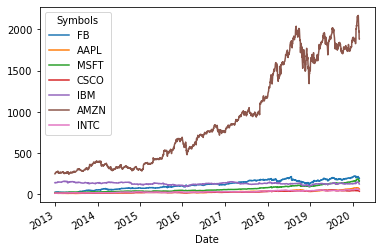

In [20]:
closing_price.plot()

In [21]:
daily_return = (closing_price/closing_price.shift(1))-1
daily_return.head()

Symbols,FB,AAPL,MSFT,CSCO,IBM,AMZN,INTC
Date,,,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.031681,0.034070,0.035115,0.025059,0.025671,0.036857
2013-01-03,-0.008214,-0.012622,-0.013396,0.005408,-0.005501,0.004547,-0.002806
2013-01-04,0.035650,-0.027855,-0.018716,0.001467,-0.006555,0.002592,-0.007505
2013-01-07,0.022949,-0.005883,-0.001870,-0.009277,-0.004382,0.035925,0.004253


In [22]:
log_d_ret = np.log(closing_price/closing_price.shift(1))
log_d_ret.head()

Symbols,FB,AAPL,MSFT,CSCO,IBM,AMZN,INTC
Date,,,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.050542,0.031190,0.033502,0.034512,0.024750,0.025347,0.036194
2013-01-03,-0.008248,-0.012703,-0.013487,0.005394,-0.005516,0.004537,-0.002810
2013-01-04,0.035029,-0.028250,-0.018893,0.001466,-0.006576,0.002589,-0.007533
2013-01-07,0.022689,-0.005900,-0.001871,-0.009321,-0.004391,0.035295,0.004244


In [23]:
log_d_ret.cov()

Symbols,FB,AAPL,MSFT,CSCO,IBM,AMZN,INTC
Symbols,,,,,,,
FB,0.000410,0.000116,0.000116,0.000083,0.000060,0.000180,0.000101
AAPL,0.000116,0.000254,0.000109,0.000095,0.000067,0.000111,0.000105
MSFT,0.000116,0.000109,0.000214,0.000106,0.000080,0.000136,0.000121
CSCO,0.000083,0.000095,0.000106,0.000200,0.000082,0.000100,0.000109
IBM,0.000060,0.000067,0.000080,0.000082,0.000162,0.000073,0.000079
AMZN,0.000180,0.000111,0.000136,0.000100,0.000073,0.000341,0.000099
INTC,0.000101,0.000105,0.000121,0.000109,0.000079,0.000099,0.000245


In [24]:
simulations = 20000
sim_ret = np.zeros(simulations)
sim_vol = np.zeros(simulations)
sim_sr = np.zeros(simulations)
no_of_comp = len(log_d_ret.columns)
sim_wt = np.zeros((simulations, no_of_comp))
for i in range(simulations):
    weights = np.array(np.random.random(no_of_comp))
    weights = weights/np.sum(weights)
    sim_wt[i] = weights
    sim_ret[i] = np.sum(log_d_ret.mean()*weights)
    sim_vol[i] = np.sqrt(np.dot(weights.T, np.dot(log_d_ret.cov(), weights)))
    sim_sr[i] = (252**0.5)*sim_ret[i]/sim_vol[i]

In [25]:
sim_sr.max()

1.2656181530881714

In [26]:
sim_sr.argmax()

3630

In [27]:
sim_wt[sim_sr.argmax()]

array([0.12320781, 0.18453344, 0.33649905, 0.03318984, 0.00083247,
       0.27045509, 0.0512823 ])

In [28]:
sr_vol = sim_vol[sim_sr.argmax()]
sr_ret = sim_ret[sim_sr.argmax()]
print(sr_ret, sr_vol)

0.0010016850202860755 0.012564023908296522


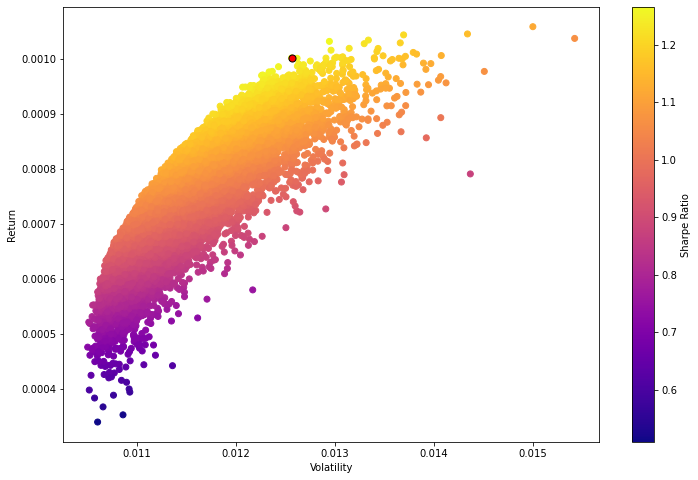

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(sim_vol,sim_ret,c=sim_sr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(sr_vol,sr_ret,c='red',s=50,edgecolors='black')

In [30]:
y_val = np.linspace(0.0004, 0.0011, 200)

In [31]:
x_val = []
def get_rvs(weights):
    ret = np.sum(log_d_ret.mean()*weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_d_ret.cov(), weights)))
    return [ret, vol,ret/vol]
def get_vol(weights):
    return get_rvs(weights)[1]
for val in y_val:
    bounds = ((0,1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))
    cons = ({'type':'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type':'eq', 'fun': lambda weights:get_rvs(weights)[0]-val})
    result_x = minimize(get_vol, [0.12, 0.2, 0.15, 0.08, 0.1, 0.15, 0.2], method='SLSQP', bounds=bounds, constraints=cons)
    x_val.append(result_x['fun'])

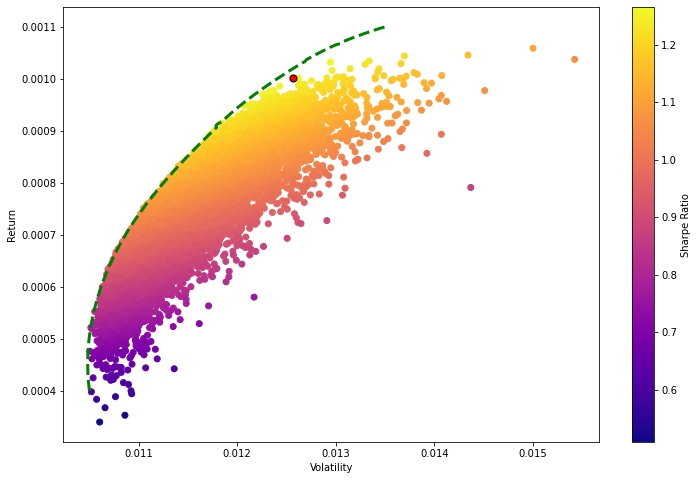

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(sim_vol,sim_ret,c=sim_sr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(sr_vol,sr_ret,c='red',s=50,edgecolors='black')
plt.plot(x_val,y_val,'g--',linewidth=3)